<a href="https://colab.research.google.com/github/treefield00/AIJobColle/blob/main/YOLO_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
mkdir -p /content/app
cd /content/app
git clone https://github.com/pjreddie/darknet
cd /content/app/darknet
make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

Cloning into 'darknet'...


In [ ]:
%%bash
cd /content/app/darknet
wget -q https://pjreddie.com/media/files/yolov3.weights


In [ ]:
%%bash
cd /content/app/darknet
wget https://road.infobuild.jp/todo23/photo/kampachi-l.jpg -O test.jpg
./darknet detect cfg/yolov3.cfg yolov3.weights test.jpg

test.jpg: Predicted in 25.679499 seconds.
truck: 96%
truck: 87%
truck: 79%
truck: 64%
bus: 76%
car: 100%
car: 100%
car: 100%
car: 99%
car: 98%
car: 98%
car: 98%
car: 98%
car: 98%
car: 98%
car: 98%
car: 97%
car: 97%
car: 97%
car: 97%
car: 97%
car: 96%
car: 95%
car: 94%
car: 92%
car: 86%
car: 85%
car: 81%
car: 65%
car: 59%
car: 57%
person: 75%
person: 64%


--2019-02-05 12:32:43--  https://road.infobuild.jp/todo23/photo/kampachi-l.jpg
Resolving road.infobuild.jp (road.infobuild.jp)... 157.7.140.103
Connecting to road.infobuild.jp (road.infobuild.jp)|157.7.140.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 296136 (289K) [image/jpeg]
Saving to: ‘test.jpg’

     0K .......... .......... .......... .......... .......... 17%  196K 1s
    50K .......... .......... .......... .......... .......... 34%  396K 1s
   100K .......... .......... .......... .......... .......... 51% 12.1M 0s
   150K .......... .......... .......... .......... .......... 69%  412K 0s
   200K .......... .......... .......... .......... .......... 86% 11.7M 0s
   250K .......... .......... .......... .........            100% 13.3M=0.5s

2019-02-05 12:32:44 (563 KB/s) - ‘test.jpg’ saved [296136/296136]

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.

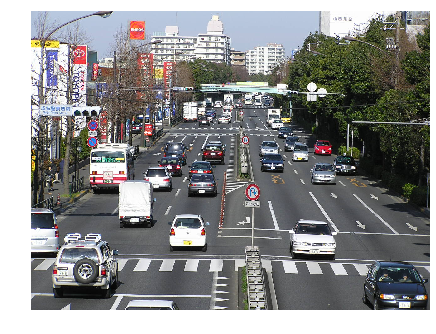

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # Python Image Library

# もとの入力画像を src に読み込む
src = Image.open('/content/app/darknet/test.jpg')
# YOLOが出力した結果を読み込む

#result = Image.open('/content/app/darknet/predictions.png')

plt.axis('off')
plt.imshow(np.asarray(src)) # srcはPILの画像形式で表示できないので変換
plt.show()

#plt.axis('off')
#plt.imshow(np.asarray(result)) # srcはPILの画像形式で表示できないので変換
#plt.show()